# Ｋ線、Ｋ線圖與Ｋ線型態

## 程式實作：使用mplfinace繪製Ｋ線圖

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

In [2]:
##### 使用2023年2月14日到2023年8月14日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day4_Day5.xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

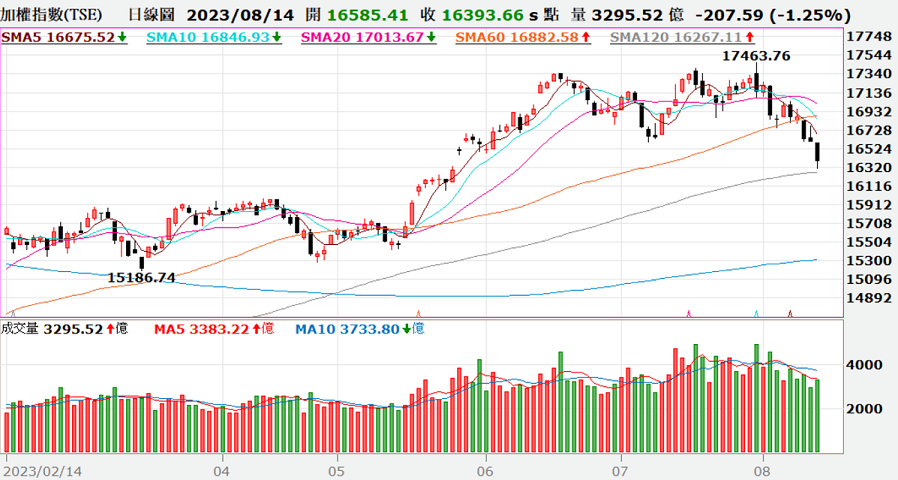

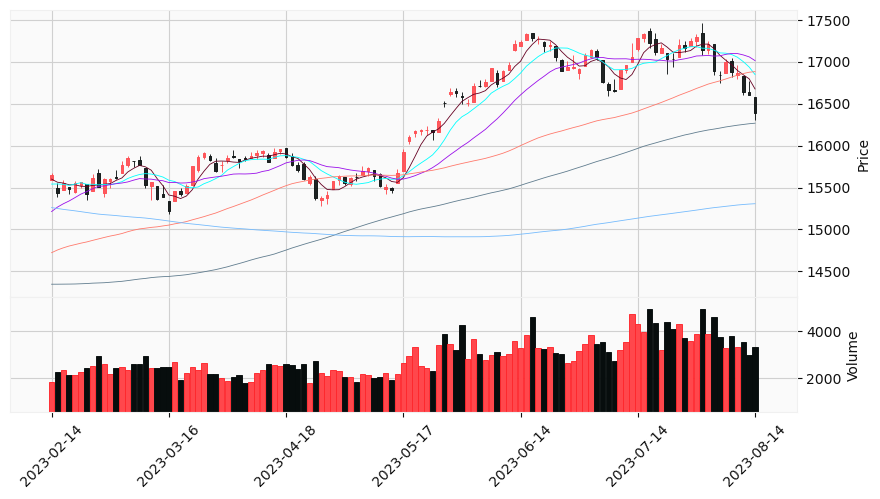

In [3]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.6,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.6,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.6,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.6,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.6,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.6,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), volume=True, datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

## 程式實作：使用talib套件識別Ｋ線型態

In [4]:
from talib.abstract import *

# 當使用talib Abstract API時，DataFrame欄位名稱需為小寫
# 請參考書籍：Python：量化交易 Ta-Lib 技術指標 139個活用技巧
df_k_line_talib = df_k_line.copy()
df_k_line_talib.columns=[ i.lower() for i in df_k_line_talib.columns]
display(df_k_line_talib)

,open,high,low,close,volume
Date,,,,,
2023-02-14,15584.74,15669.63,15584.74,15654.48,1816.98
2023-02-15,15497.67,15553.68,15388.85,15432.89,2269.22
2023-02-16,15474.46,15585.48,15474.46,15550.50,2340.71
2023-02-17,15503.75,15503.75,15418.43,15479.70,2142.15
2023-02-20,15452.01,15575.32,15436.66,15551.23,2113.66
...,...,...,...,...,...
2023-08-08,17006.46,17043.56,16812.59,16877.07,3792.46
2023-08-09,16836.64,16956.73,16798.50,16870.94,3328.75
2023-08-10,16827.11,16827.11,16601.17,16634.70,3543.66


In [5]:
# 識別紡錘線型態
flag = False
ret = CDLSPINNINGTOP(df_k_line_talib)
for i in range(0,len(ret)) :
    signal = ret[i]
    if signal != 0:
        print(df_k_line_talib.iloc[i].name.strftime("%Y-%m-%d"),signal)
        flag = True
if flag == False :
    print('區間內未識別紡錘線型態')

2023-03-02 100
2023-03-08 -100
2023-03-29 100
2023-03-30 100
2023-03-31 -100
2023-04-07 -100
2023-04-11 100
2023-04-26 100
2023-04-27 100
2023-05-05 -100
2023-05-12 100
2023-05-15 -100
2023-05-22 100
2023-05-23 100
2023-05-26 -100
2023-05-30 -100
2023-05-31 -100
2023-06-01 100
2023-06-05 -100
2023-06-19 100
2023-06-21 100
2023-06-29 100
2023-07-10 -100
2023-07-24 -100
2023-08-04 -100
2023-08-09 100


In [6]:
# 識別十字線型態
flag = False
ret = CDLDOJI(df_k_line_talib)
for i in range(0,len(ret)) :
    signal = ret[i]
    if signal != 0:
        print(df_k_line_talib.iloc[i].name.strftime("%Y-%m-%d"),signal)
        flag = True
if flag == False :
    print('區間內未識別十字線型態')

2023-03-03 100
2023-03-08 100
2023-03-29 100
2023-03-31 100
2023-05-05 100
2023-05-22 100
2023-05-23 100
2023-05-26 100
2023-06-01 100
2023-06-05 100
2023-06-19 100
2023-07-10 100
2023-07-24 100
2023-08-04 100


In [7]:
# 識別鎚子線型態
flag = False
ret = CDLHAMMER(df_k_line_talib)
for i in range(0,len(ret)) :
    signal = ret[i]
    if signal != 0:
        print(df_k_line_talib.iloc[i].name.strftime("%Y-%m-%d"),signal)
        flag = True
if flag == False :
    print('區間內未識別鎚子線型態')

2023-04-06 100
2023-06-30 100
2023-07-21 100
